# Unit 5 - Example 2

Import of Python libraries

In [1]:
## imports
import math
import pandas as pd
from IPython.display import HTML, display


## Der folgende Code dient zur Implementierung der Funktionalität, damit Code ein- und ausgeblendet werden kann.
def toggle_code():
    toggle_code_js_html = '''
    <script>
    function code_toggle() {
        if ($('div.cell.code_cell.rendered.selected div.input').css('display')!='none'){
            $('div.cell.code_cell.rendered.selected div.input').hide();
        } else {
            $('div.cell.code_cell.rendered.selected div.input').show();
        }
    }
    </script>
    <form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Toggle code"></form>
    '''
    display(HTML(toggle_code_js_html))


toggle_code()

# Exercise

In Finance the is the assumption that the yield of stocks is normal distributed. Therefore the yield can be viewed as a stochastic variable X where $\mu$ is the expected rate of return and the standard deviation $\sigma$ is the fluctuation of the rate of return, i.e. the risk.

If it is assumed that there are three stocks A, B, and C. The rate of return of stock A is normal distributed with N(44%,22%), the rate of return of stock B is normal distributed with N(36%,20%) and for stock C the assumption is N(10%,4%). What is the probability of a loss (i.e. yield is below zero) for an investor who invests in one stock?

# Solution

In [2]:
from scipy.stats import norm

We need to compute  
for stock A: P(X<0) given N(0.44, 0.22).  
for stock B: P(X<0) given N(0.36, 0.20).  
for stock C: P(X<0) given N(0.1, 0.04).  

### Stock A

**What is the probability for a loss when one invests in stock A?**

$$ P(Z < z) = F_{St}(z) $$
given $z = 0$, $ \mu = 0.44 $ and $ \sigma = 0.22 $

In [3]:
# z-Transformation
z = (0 - 0.44) / 0.22
print(z)

-2.0


In [4]:
# P(Z < z) = F(z)
norm.cdf(z)

0.022750131948179195

### Stock B

**What is the probability for a loss when one invests in stock A?**

$$ P(Z < z) = F_{St}(z) $$
given $z = 0$, $ \mu = 0.36 $ and $ \sigma = 0.2 $

In [5]:
# z-Transformation
z = (0 - 0.36) / 0.2
print(z)

-1.7999999999999998


In [6]:
# P(Z < z) = F(z)
norm.cdf(z)

0.03593031911292581

### Stock C

**What is the probability for a loss when one invests in stock A?**

$$ P(Z < z) = F_{St}(z) $$
given $z = 0$, $ \mu = 0.1 $ and $ \sigma = 0.04 $

In [7]:
# z-Transformation
z = (0 - 0.1) / 0.04
print(z)

-2.5


In [8]:
# P(Z < z) = F(z)
norm.cdf(z)

0.006209665325776132

# Chart: Density plot

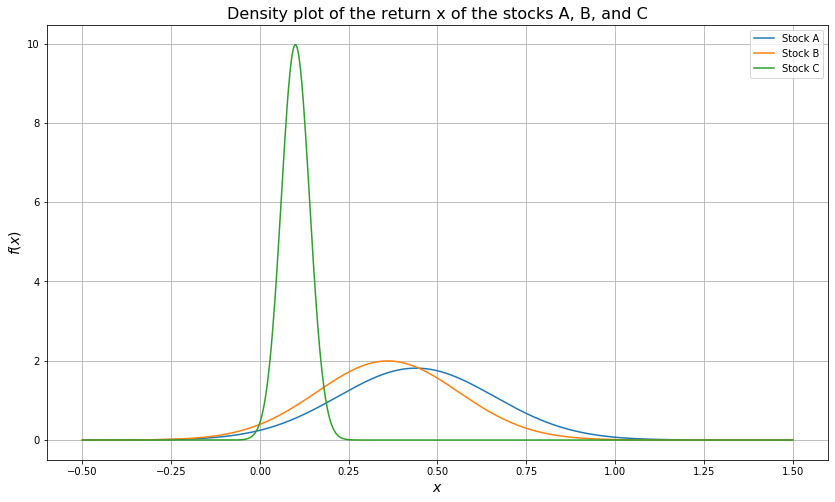

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(14, 8))

## A
x_values = np.linspace(-0.5, 1.5, 1000)
y_values = [norm.pdf(i, loc=0.44, scale=0.22) for i in x_values]
ax.plot(x_values, y_values, label='Stock A')

## B
x_values = np.linspace(-0.5, 1.5, 1000)
y_values = [norm.pdf(i, loc=0.36, scale=0.2) for i in x_values]
ax.plot(x_values, y_values, label='Stock B')

## C
x_values = np.linspace(-0.5, 1.5, 1000)
y_values = [norm.pdf(i, loc=0.1, scale=0.04) for i in x_values]
ax.plot(x_values, y_values, label='Stock C')

ax.set_title('Density plot of the return x of the stocks A, B, and C', size=16)
ax.set_xlabel('$x$', size=14)
ax.set_ylabel('$f(x)$', size=14)

ax.grid(True, axis='both')

#ax.set_xticks(np.linspace(-3, 3, 13))
#ax.set_xticklabels(x_labels)

#ax.set_yticks(np.linspace(0.0, 1.0, 11))

## Wert neben Linie schreiben
#for x, y in zip(x_values, y_values):
#    ax.annotate(str(y), xy=(x, y - 0.04), size=14)

#major_ticks = np.arange(0, 1.1, 0.1)    
#ax.set_yticks(major_ticks)

plt.legend()

plt.show()
toggle_code()

# Interactive Plot
## Probability for loss

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

%matplotlib inline


def make_plot(mu, sigma):
    fig, ax = plt.subplots(figsize=(14, 8))

    x_values = np.linspace(-0.5, 1.5, 1000)
    y_values = [norm.pdf(i, loc=mu, scale=sigma) for i in x_values]
    ax.plot(x_values, y_values, label='Aktie A')

    ax.set_title('Density plot for $\mu$={:.2f} and $\sigma$={:.2f} and probability for loss, i.e. P(X)<0'.format(
                    mu, sigma),
                 size=16)
    ax.set_xlabel('$x$', size=14)
    ax.set_ylabel('$f(x)$', size=14)

    ax.grid(True, axis='both')

    ## Linie bei x=0
    x = 0
    y = norm.pdf(x, loc=mu, scale=sigma)
    plt.vlines(x, 0, y)
    
    ## Text für Ergebnis
    p_verlust = norm.cdf(x, loc=mu, scale=sigma)
    plt.annotate(
        'P(X<0) = {:.4f}'.format(p_verlust),
        size=14,
        xy=(0.1, 0.1)
    )    
    
    ## Fläche markieren
    xs = np.linspace(-0.5, 0, 250)
    ys1 = [0 for i in xs]
    ys2 = [norm.pdf(i, loc=mu, scale=sigma) for i in xs]
    plt.fill_between(x=xs, y1=ys1, y2=ys2, color='yellow')


toggle_code()

In [14]:
interactive(
    make_plot, 
    mu=widgets.FloatSlider(value=0.44, min=0.01, max=0.5, step=0.01, continuous_update=False, description='$\mu$'),
    sigma=widgets.FloatSlider(value=0.22, min=0.01, max=0.5, step=0.01, continuous_update=False, description='$\sigma$'))

interactive(children=(FloatSlider(value=0.44, continuous_update=False, description='$\\mu$', max=0.5, min=0.01…